<a href="https://colab.research.google.com/github/bhavish-1/Predicting_ad_click_Project/blob/master/Predicting_Ad_Click_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting an Ad click using Logistic regression and also Random forest**

In [ ]:
# importing all the requried libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_set = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/advertising.csv")
data_set.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
data_set.info()

# can clearly see that there is no null values in the Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
data_set.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


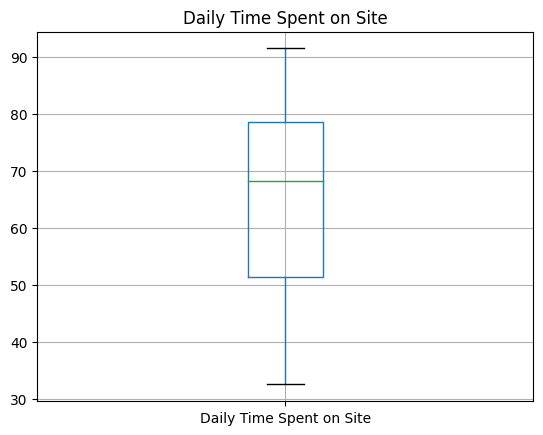

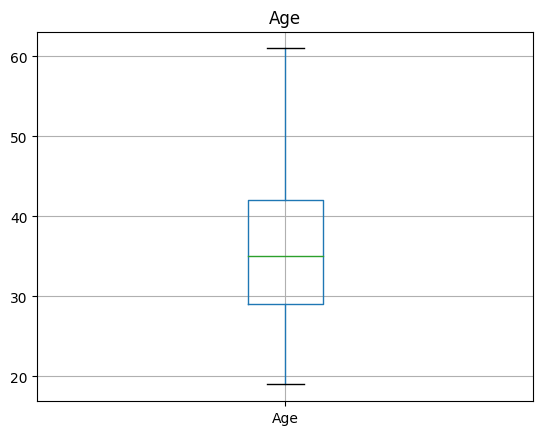

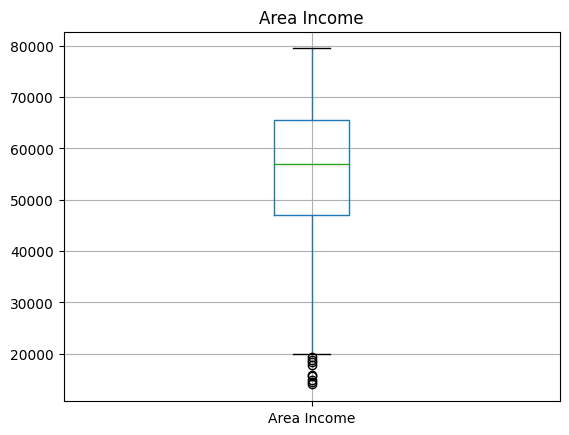

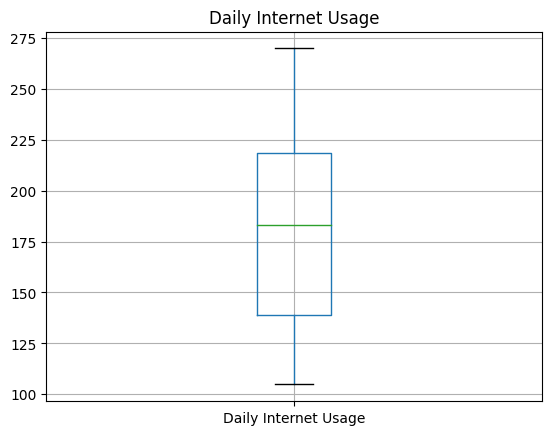

ValueError: ignored

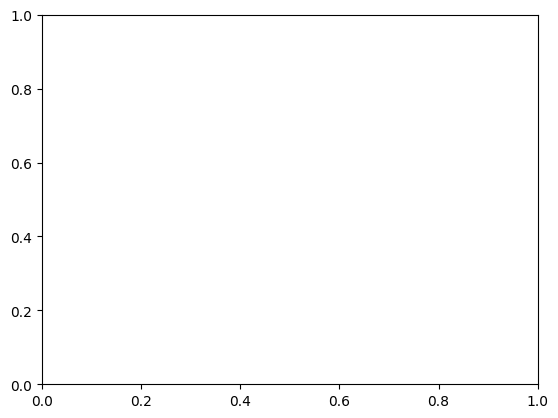

In [ ]:
# In this step we will try to remove all the outlies so we will boxplot
for column in data_set.columns:
    data_set[[column]].boxplot()
    plt.title(column)
    plt.show()

    # from the boxplot we can clearly see area income has outliers

In [ ]:
data_set['Area_Income'].describe()

count     1000.000000
mean     55000.000080
std      13414.634022
min      13996.500000
25%      47031.802500
50%      57012.300000
75%      65470.635000
max      79484.800000
Name: Area_Income, dtype: float64

<ipython-input-139-d8a789654bb3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = duplicate_dataset.corr()
<ipython-input-139-d8a789654bb3>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(duplicate_dataset.corr(), annot=True, fmt= '.2f')


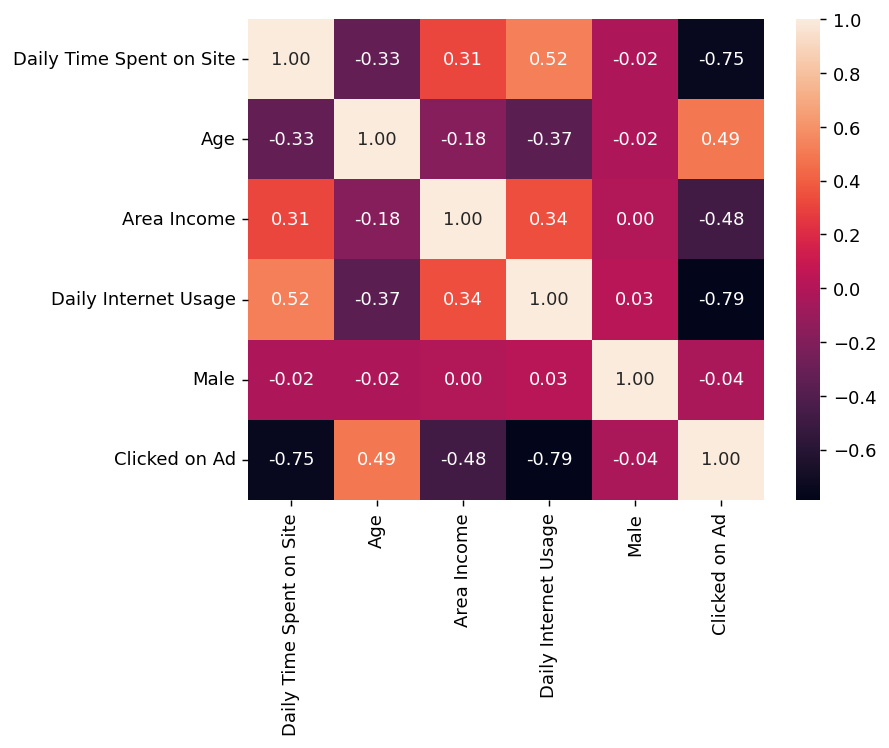

In [ ]:
duplicate_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/advertising.csv")
corr = duplicate_dataset.corr()

plt.figure(dpi=130)
sns.heatmap(duplicate_dataset.corr(), annot=True, fmt= '.2f')
plt.show()

<Axes: >

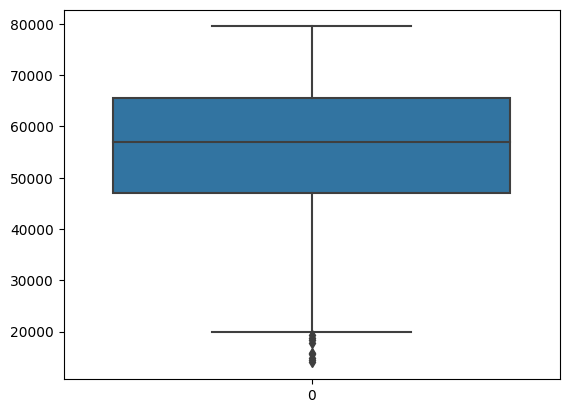

In [ ]:
sns.boxplot(data_set['Area_Income'])

In [ ]:
# lets quartile clipping for the values and remove the outliers
q1 = data_set['Area_Income'].quantile(0.25)
q3 = data_set['Area_Income'].quantile(0.75)

print(q1,q3)

iqr = q3-q1

print(iqr)

47031.8025 65470.634999999995
18438.832499999997


In [ ]:
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print(upper_limit, lower_limit)

93128.88375 19373.553750000003


In [ ]:
data_set[data_set['Area_Income'] < lower_limit]

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad_Topic_Line,City,Male,Country,Clicked_on_Ad
135,49.89,39,17709.98,160.03,Enhanced system-worthy application,East Michele,1,Belize,1
410,48.09,33,19345.36,180.42,Balanced motivating help-desk,West Travismouth,0,Heard Island and McDonald Islands,1
510,57.86,30,18819.34,166.86,Horizontal modular success,Estesfurt,0,Algeria,1
640,64.63,45,15598.29,158.80,Triple-buffered high-level Internet solution,Isaacborough,1,Azerbaijan,1
665,58.05,32,15879.10,195.54,Total asynchronous architecture,Sanderstown,1,Tajikistan,1
692,66.26,47,14548.06,179.04,Optional full-range projection,Matthewtown,1,Lebanon,1
768,68.58,41,13996.50,171.54,Exclusive discrete firmware,New Williamville,1,El Salvador,1
778,52.67,44,14775.50,191.26,Persevering 5thgeneration knowledge user,New Hollyberg,0,Jersey,1
952,62.79,36,18368.57,231.87,Total coherent archive,New James,1,Luxembourg,1


In [ ]:
data_set['Area_Income'] = np.where(
    data_set['Area_Income'] > upper_limit,
    upper_limit,
    np.where(
        data_set['Area_Income'] < lower_limit,
        lower_limit,
        data_set['Area_Income']
    )
)

data_set[data_set['Area_Income'] < lower_limit]

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad_Topic_Line,City,Male,Country,Clicked_on_Ad


In [ ]:
data_set.columns = data_set.columns.str.replace(' ', '_')
data_set.head()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad_Topic_Line,City,Male,Country,Clicked_on_Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0


In [ ]:
data_set.shape

(1000, 9)

In [ ]:
print(data_set['Daily_Time_Spent_on_Site'].skew())
print(data_set['Age'].skew())
print(data_set['Area_Income'].skew())
print(data_set['Daily_Internet_Usage'].skew())
# Here i will try to decrease the skewness in daily time spent on site , area income and daily internet usage

-0.37176048811269113
0.4791416884125751
-0.6209817334744657
-0.033537358656959886


In [ ]:
# doing one hot encoding for the col ad_topic_line and city and country

data_set = pd.get_dummies(data_set, columns=['Ad_Topic_Line'], drop_first=True)
data_set = pd.get_dummies(data_set, columns=['City'],drop_first = True)
data_set = pd.get_dummies(data_set, columns=['Country'],drop_first = True)

In [ ]:
data_set.head()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Male,Clicked_on_Ad,Ad_Topic_Line_Adaptive asynchronous attitude,Ad_Topic_Line_Adaptive context-sensitive application,Ad_Topic_Line_Adaptive contextually-based methodology,Ad_Topic_Line_Adaptive demand-driven knowledgebase,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,68.95,35,61833.90,256.09,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,31,68441.85,193.77,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,26,59785.94,236.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,29,54806.18,245.89,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,35,73889.99,225.58,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_set.shape

(1000, 2209)

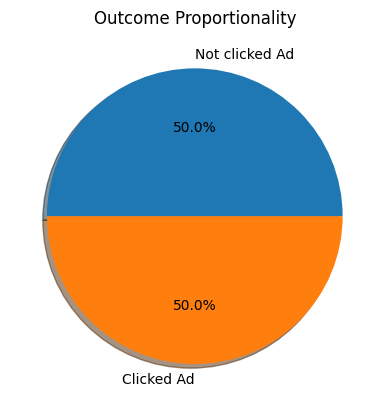

In [ ]:
# checking whether there is any data imbalance in the dataset
plt.pie(data_set.Clicked_on_Ad.value_counts(),
        labels=['Not clicked Ad', 'Clicked Ad'],
        autopct='%.1f%%',
        shadow=True)

plt.title('Outcome Proportionality')
plt.show()

# here we can clearly see there is no data imbalance

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = data_set.drop(columns =['Clicked_on_Ad'])
y = data_set.Clicked_on_Ad

# doing normalization of the datapoints

scaler = MinMaxScaler(feature_range=(0, 1))

x = scaler.fit_transform(x)
print(x[:5])

[[0.61788203 0.38095238 0.70636277 ... 0.         0.         0.        ]
 [0.80962094 0.28571429 0.81629145 ... 0.         0.         0.        ]
 [0.62672106 0.16666667 0.67229327 ... 0.         0.         0.        ]
 [0.70627231 0.23809524 0.58945087 ... 0.         0.         0.        ]
 [0.60802312 0.38095238 0.90692574 ... 0.         0.         0.        ]]


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

num_rows = x_train.shape[0]
print(num_rows)

800


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(x_train, y_train)

# Once the model is trained, we can use it to make predictions on new data
y_pred = model.predict(x_test)

# Optionally, you can also get the predicted probabilities for each class
# This is useful for tasks like setting different classification thresholds
y_prob = model.predict_proba(x_test)

df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
520,1,1
647,1,1
530,1,1
244,0,0
607,0,0
...,...,...
804,1,1
229,0,0
884,0,0
976,1,1


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_model = accuracy_score(y_test, y_pred)
print(accuracy_model)

0.96


In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)

print(confusion)

[[97  0]
 [ 8 95]]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 1.00
Recall: 0.92
F1 Score: 0.96


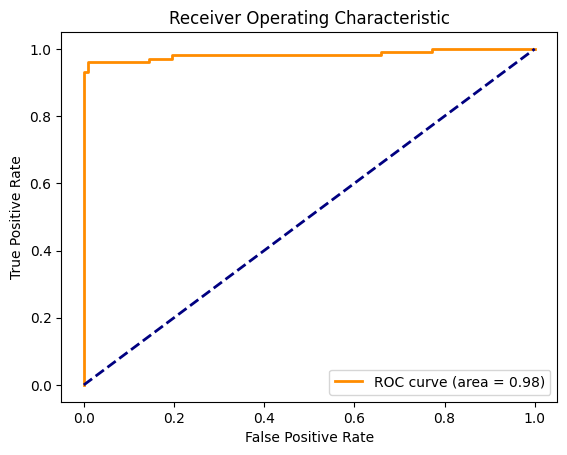

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_prob contains predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of RandomForestClassifier
rfc = RandomForestClassifier()

# Train the model on your training data
rfc.fit(x_train, y_train)


RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(x_test)
rfc_accuracy = accuracy_score(y_test,y_pred)
print(rfc_accuracy)

0.96
